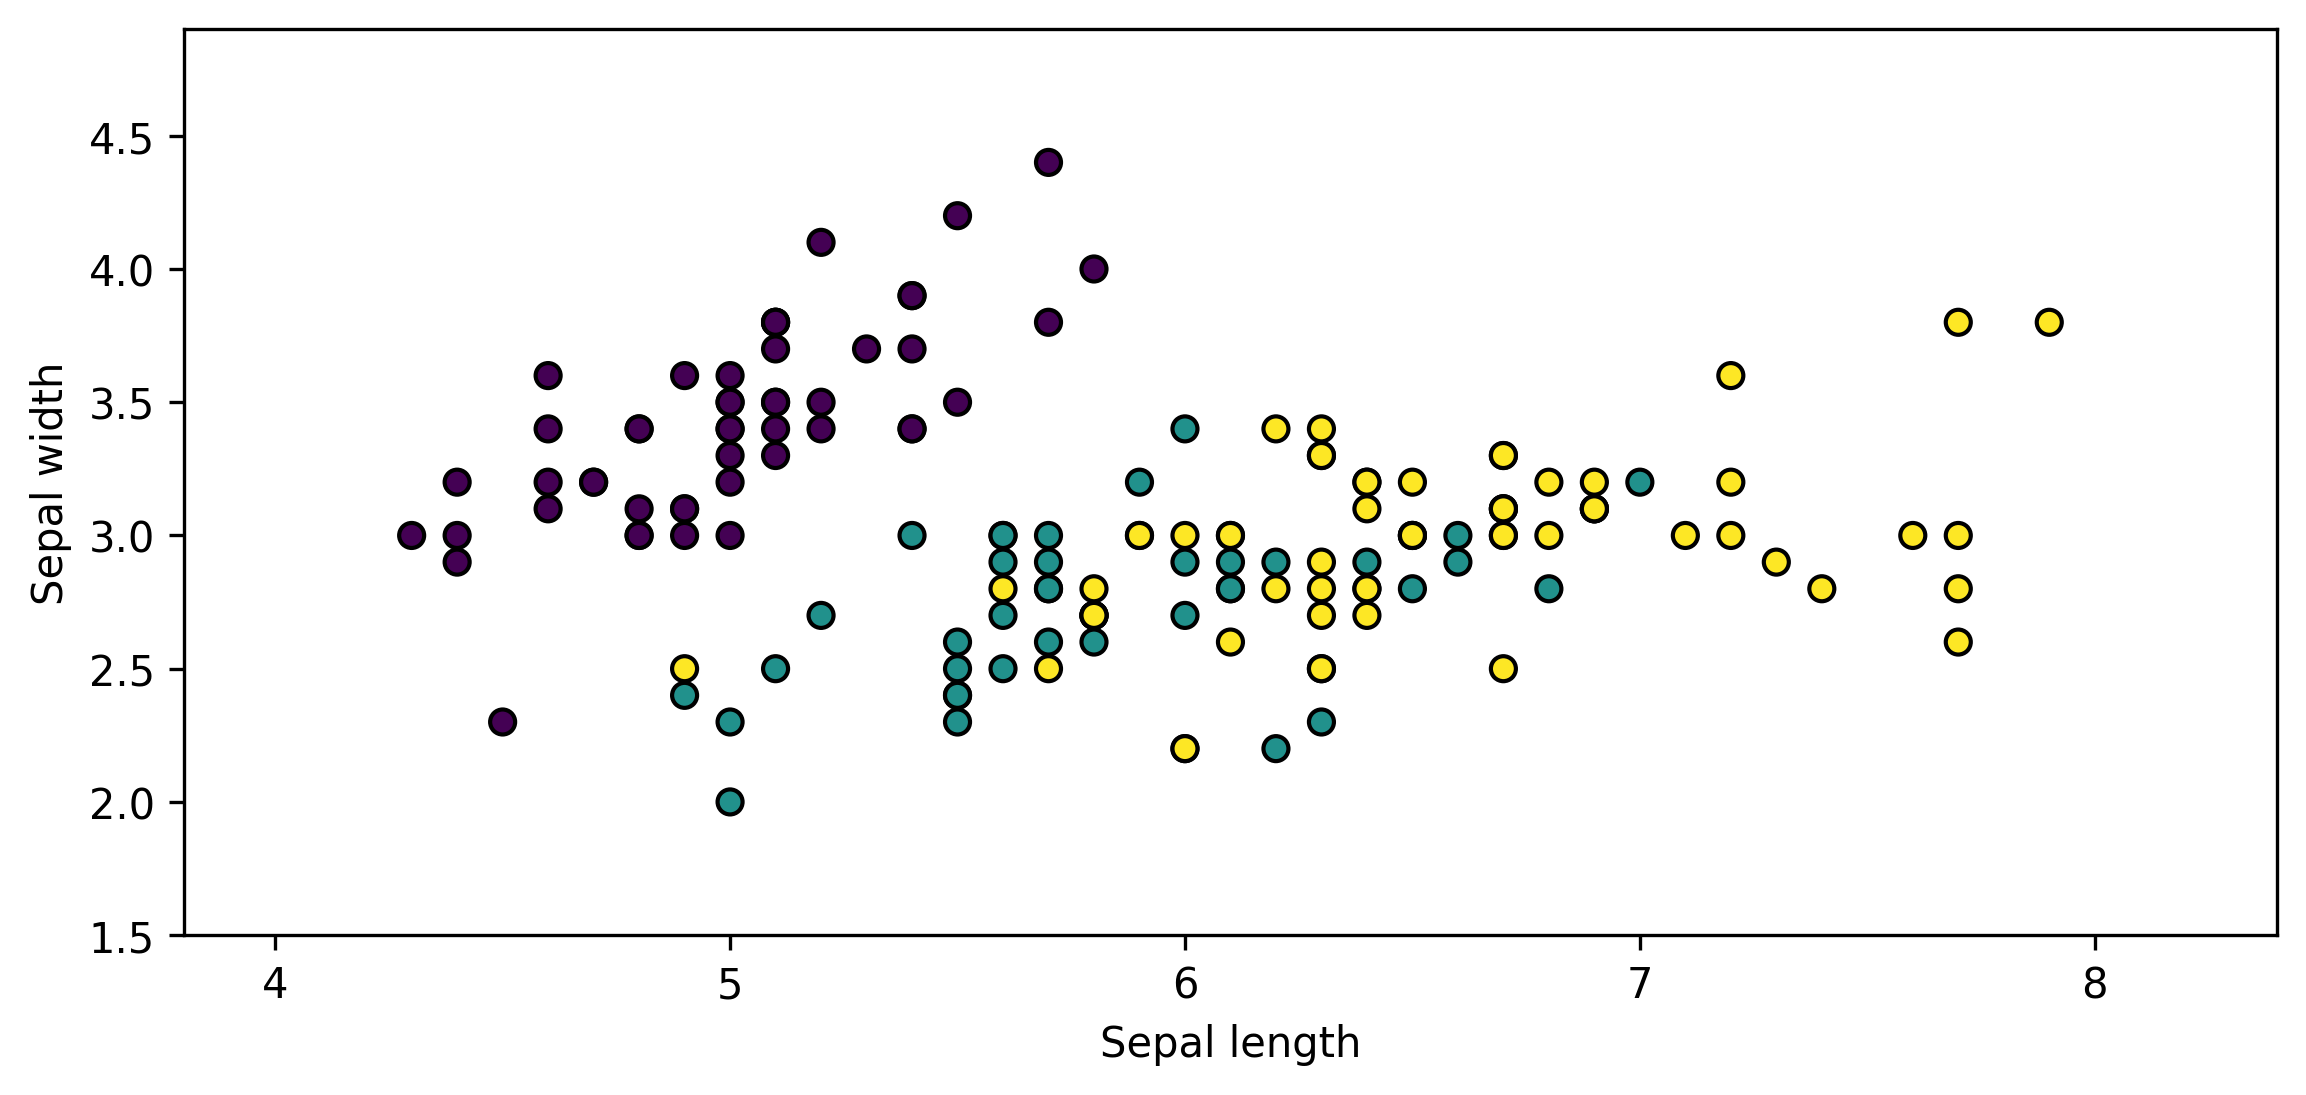

In [3]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from rerf.rerfClassifier import rerfClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

matplotlib.rc('figure', figsize=[12,8], dpi = 300)
plt.figure(figsize=(9,4))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()



In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest


# Load dataset
iris = datasets.load_iris()


X = iris.data


clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=1)
print(clf)



UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=1)


[[1.   0.11 0.06 ... 0.   0.   0.  ]
 [0.05 1.   0.17 ... 0.   0.   0.  ]
 [0.09 0.24 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.07 0.05]
 [0.   0.   0.   ... 0.09 1.   0.03]
 [0.   0.   0.   ... 0.06 0.   1.  ]]


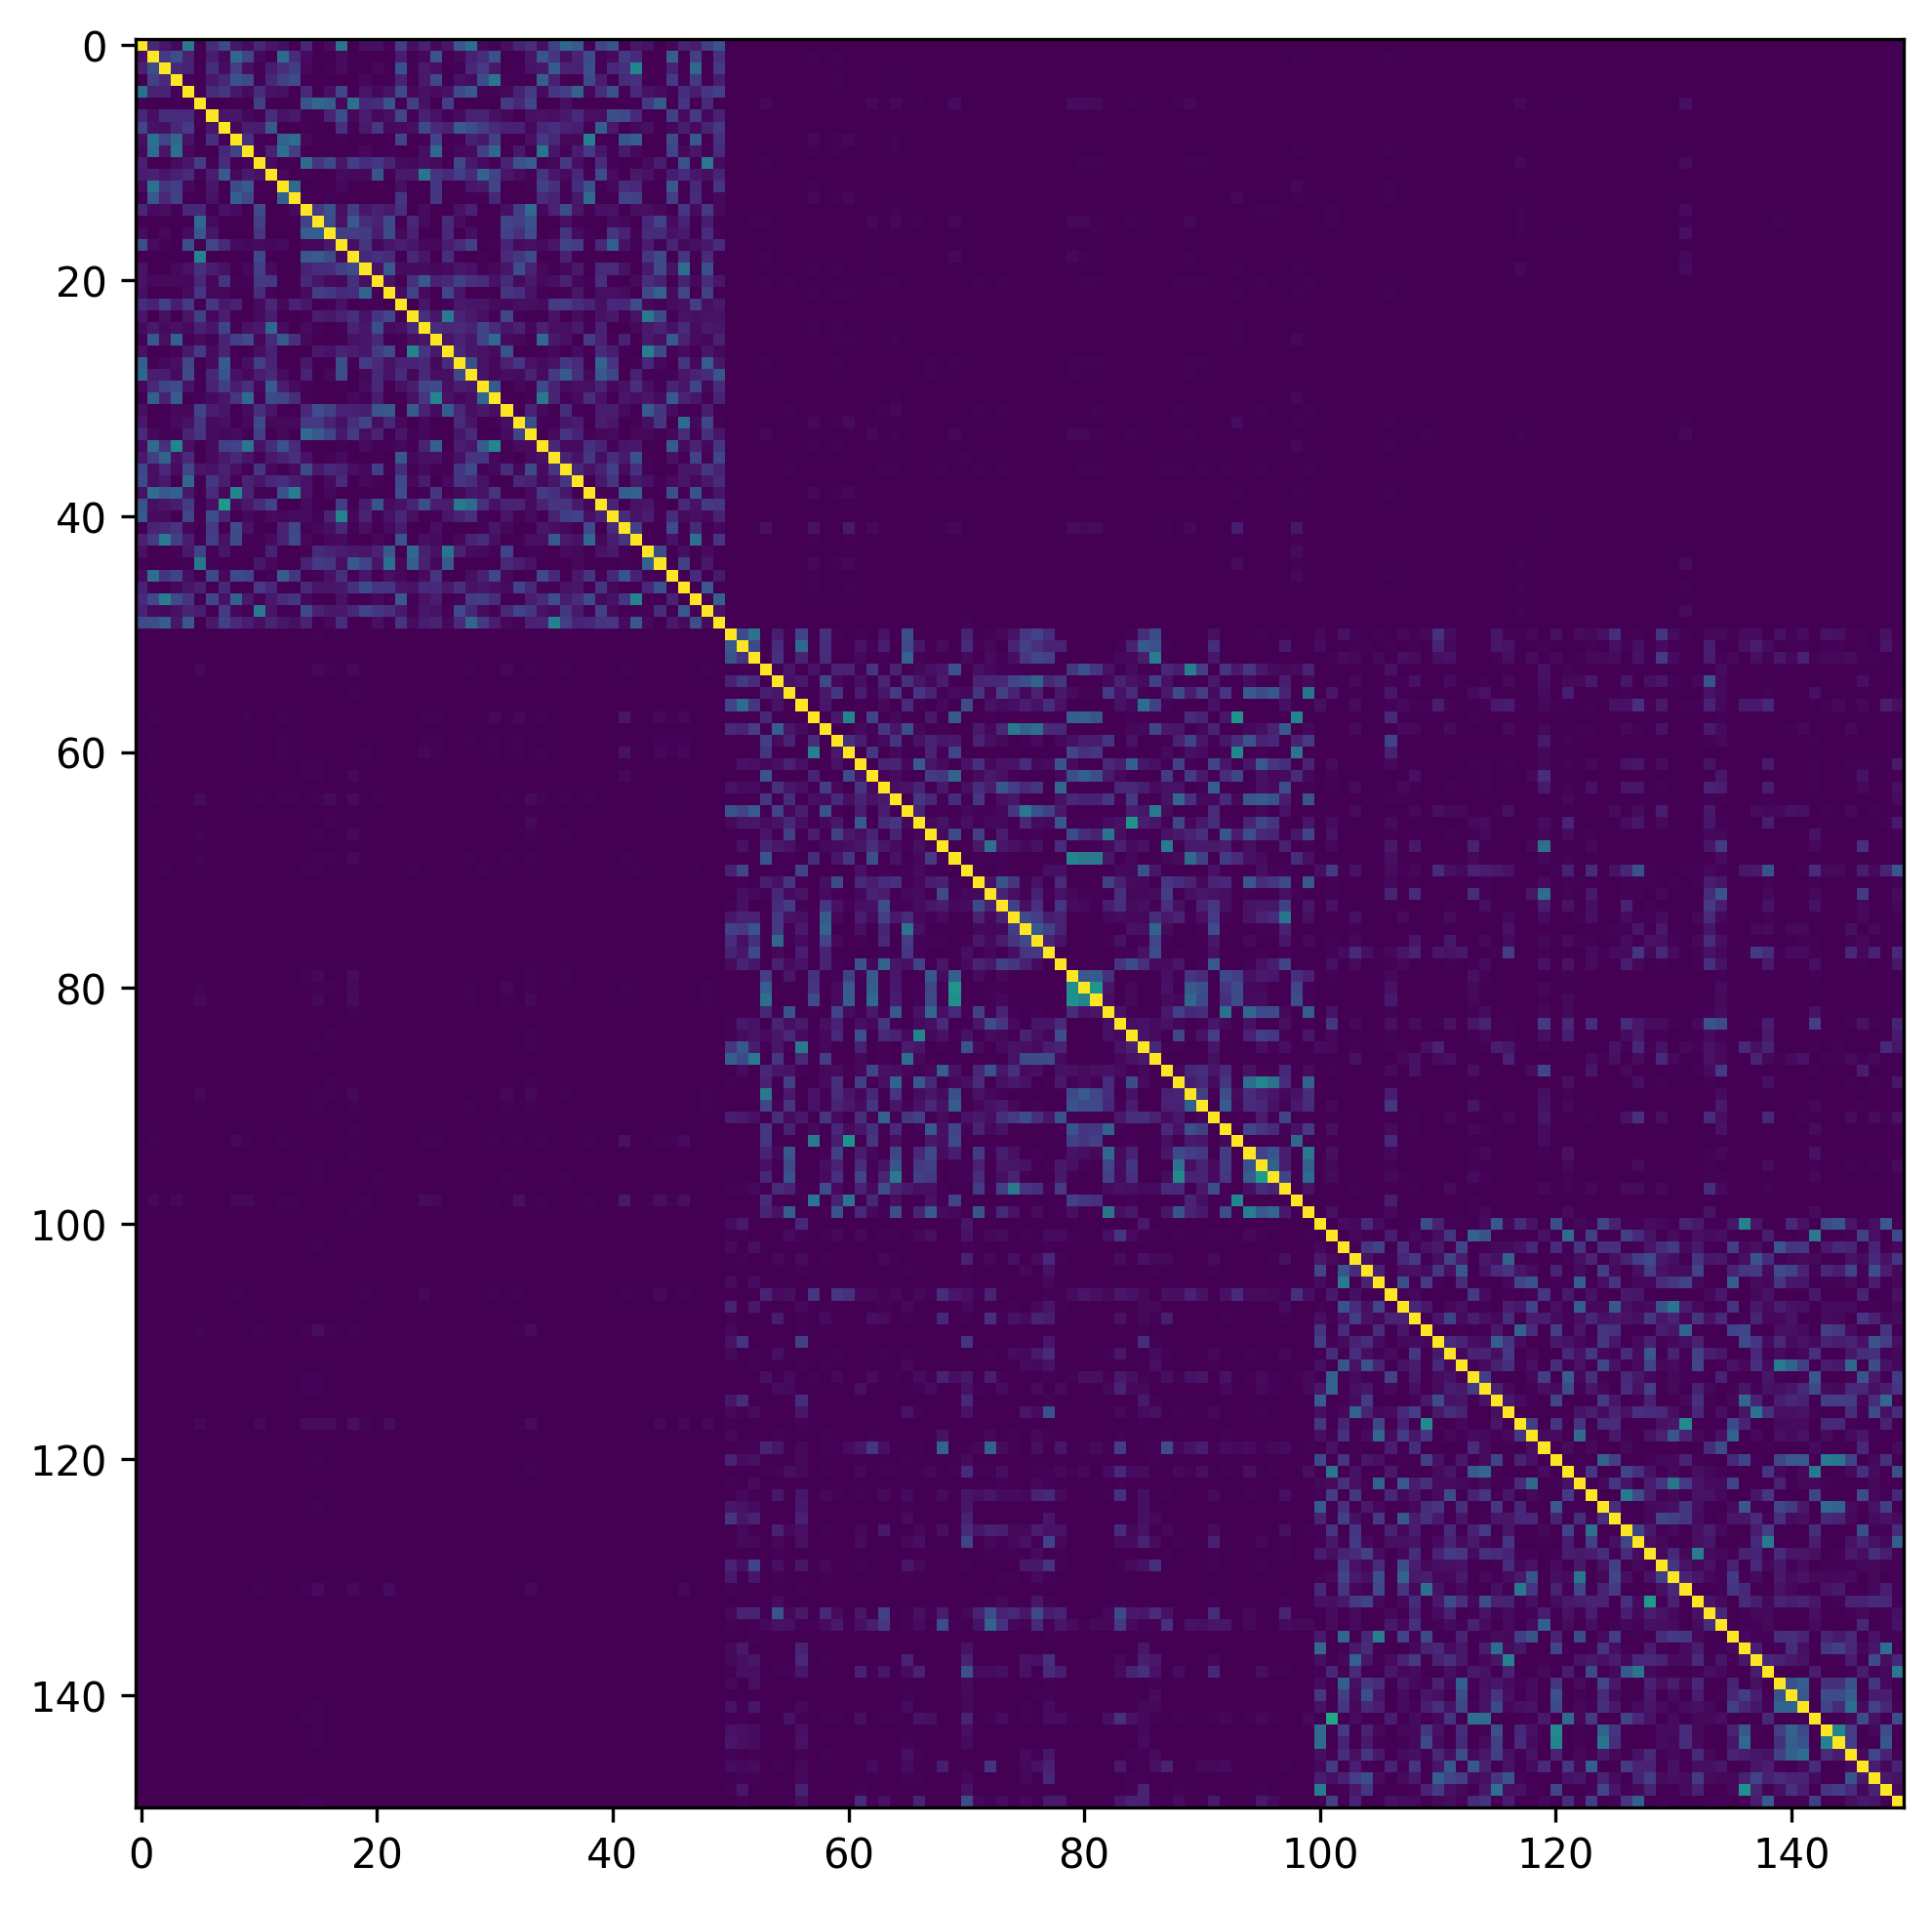

In [19]:

clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)



In [20]:

cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)



labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Adjusted Rand Score: 0.745503868180448
